# Spring-Slider Model with Rate-State Friction

This notebook simulates the evolution of fault slip after a sudden stress change using a spring-slider model with rate-state friction laws.

## Model Description

The spring-slider model represents a fault as a block connected to a loading plate by a spring. The friction on the fault follows rate-and-state friction laws, which are commonly used to describe earthquake nucleation and afterslip.

### Parameters:
- **d_c**: Critical displacement (m)
- **A**: Rate-state parameter (controls direct velocity effect)
- **B**: Rate-state parameter (controls evolution effect)
- **σ**: Normal stress (MPa)
- **L**: Radius of slip patch (m)
- **v_inf**: Load-point velocity (m/yr)
- **Δτ**: Instantaneous stress change (MPa)

### Governing Equations:

The model solves the following differential equations:

**Velocity evolution:**
$$\frac{dv}{dt} = \frac{ \frac{\dot \tau}{\sigma} - \frac{B}{\theta}\frac{d\theta}{dt}} {{\frac{\eta}{\sigma} + \frac{A}{v}}}$$

**State variable (Aging Law):**
$$\frac{d\theta}{dt} = 1 - \frac{\theta v}{d_c}$$

**Shear stress:**
$$\frac{d\tau}{dt} = k(v_{\infty} - v)$$

**Displacement:**
$$\frac{du}{dt} = v$$

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the spring-slider model module
from spring_slider_model import forward_model, run_forward_model

print("Spring-slider model module loaded successfully!")

Spring-slider model module loaded successfully!


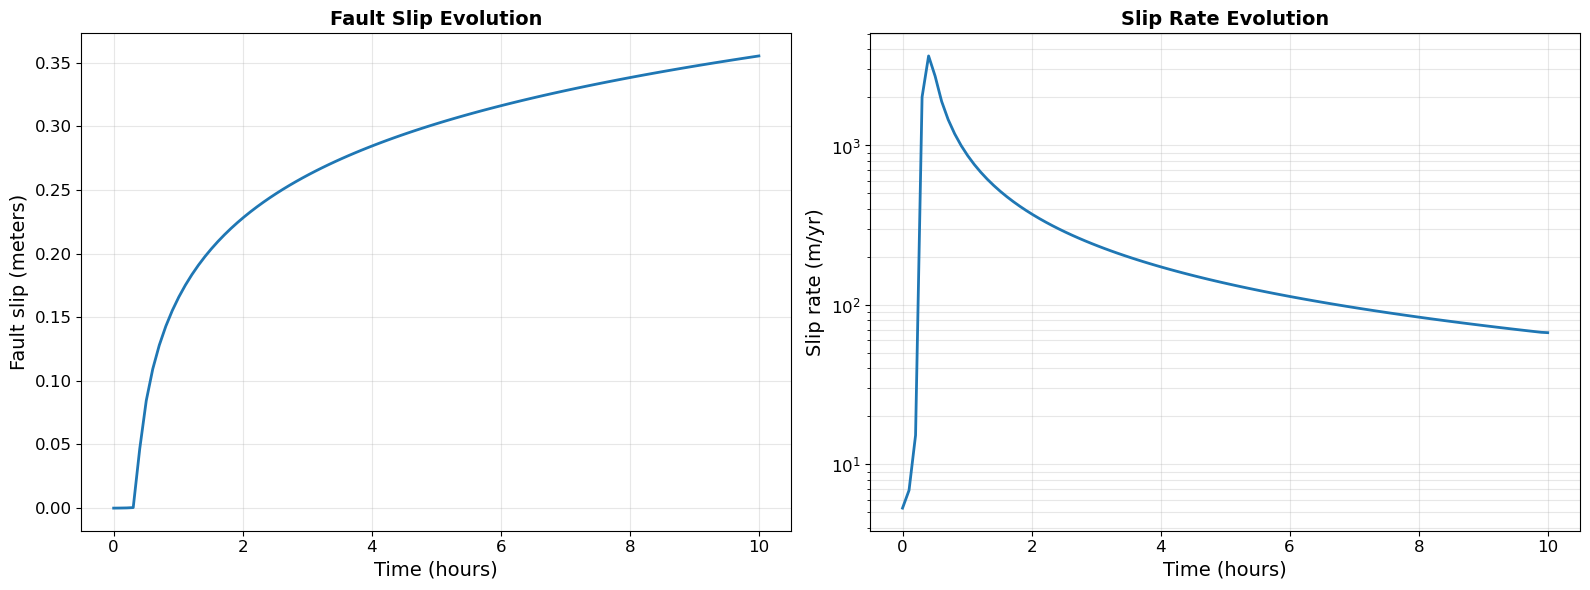

In [10]:
# Run the forward model with defined parameters

    
# INPUT PARAMETERS
d_c = 1e-4          # critical displacement (m)
A = 0.01            # rate-state parameter A
B = 0.006           # rate-state parameter B
sigma = 20          # normal stress (MPa)
L = 25000           # radius of slip patch (m)
v_inf = 0.03        # load-point velocity (m/yr)
deltau = 1.0          # instantaneous stress change (MPa)

# Parameter vector
X = np.array([d_c, A, B, sigma, L, v_inf, deltau])

# Observation times (years)
times = np.linspace(0, 10 / 365 / 24, 100)  # 10 hours converted to years

# Run forward model
u = forward_model(X, times)


# Convert times from years to hours for plotting
times_hours = times * 24 * 365

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


ax1.plot(times_hours, u, linewidth=2)
ax1.set_xlabel('Time (hours)', fontsize=14)
ax1.set_ylabel('Fault slip (meters)', fontsize=14)
ax1.set_title('Fault Slip Evolution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(labelsize=12)

# Plot slip rate (derivative)
dt = times[1] - times[0]
v = np.gradient(u, dt)


ax2.semilogy(times_hours, v, linewidth=2)
ax2.set_xlabel('Time (hours)', fontsize=14)
ax2.set_ylabel('Slip rate (m/yr)', fontsize=14)
ax2.set_title('Slip Rate Evolution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')
ax2.tick_params(labelsize=12)

plt.tight_layout()
plt.show()



## Generate Synthetic Data

Create a synthetic dataset by adding Gaussian noise to the model predictions. This simulates observational data with measurement uncertainty.

Synthetic data saved to 'synthetic_slip_data.txt'
Noise level: 5.0% of signal amplitude
Signal amplitude: 0.3553 m
Noise sigma: 0.017766 m
Number of data points: 100


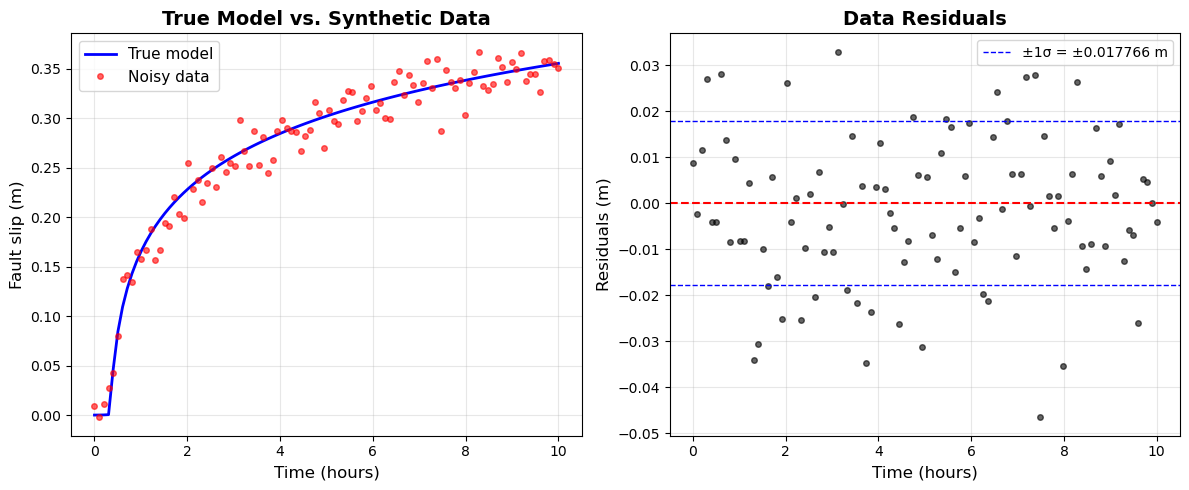

In [11]:
# Generate synthetic data with noise

# Set noise level as a fraction of signal amplitude
noise_fraction = 0.05  # 5% noise level

# Calculate signal amplitude
signal_amplitude = np.max(u) - np.min(u)

# Calculate standard deviation for noise
sigma_noise = noise_fraction * signal_amplitude

# Add Gaussian noise to the slip data
np.random.seed(42)  # For reproducibility
u_noisy = u + np.random.normal(0, sigma_noise, len(u))

# Create array of uncertainties (same for all points)
sigma_array = np.full(len(u), sigma_noise)

# Prepare data for output: time (years), slip (m), sigma (m)
data_output = np.column_stack((times, u_noisy, sigma_array))

# Save to text file
output_filename = 'synthetic_slip_data.txt'
header = 'Time (years)\tFault Slip (m)\tSigma (m)'
np.savetxt(output_filename, data_output, delimiter='\t', header=header, 
           fmt='%.10e', comments='')

print(f"Synthetic data saved to '{output_filename}'")
print(f"Noise level: {noise_fraction*100:.1f}% of signal amplitude")
print(f"Signal amplitude: {signal_amplitude:.4f} m")
print(f"Noise sigma: {sigma_noise:.6f} m")
print(f"Number of data points: {len(u)}")

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(times_hours, u, 'b-', linewidth=2, label='True model')
plt.plot(times_hours, u_noisy, 'ro', markersize=4, alpha=0.6, label='Noisy data')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Fault slip (m)', fontsize=12)
plt.title('True Model vs. Synthetic Data', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = u_noisy - u
plt.plot(times_hours, residuals, 'ko', markersize=4, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5)
plt.axhline(y=sigma_noise, color='b', linestyle='--', linewidth=1, label=f'±1σ = ±{sigma_noise:.6f} m')
plt.axhline(y=-sigma_noise, color='b', linestyle='--', linewidth=1)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Residuals (m)', fontsize=12)
plt.title('Data Residuals', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()